In [1]:
from __future__ import print_function
import os
data_path = ['data']
import pandas as pd

filepath = os.sep.join(data_path + ['heart.csv'])
data = pd.read_csv('heart.csv')

In [2]:
x_cols = [x for x in data.columns if x != 'output']
X_data = data[x_cols]
y_data = data['output']

In [3]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_data, y_data)
y_pred = knn.predict(X_data)

In [4]:
def accuracy(real, predict):
    return sum(y_data == y_pred) / float(real.shape[0])

score_list = list()

for k in range(1, 21):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_data, y_data)
    
    y_pred = knn.predict(X_data)
    score = accuracy(y_data, y_pred)
    
    score_list.append((k, score))
    
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

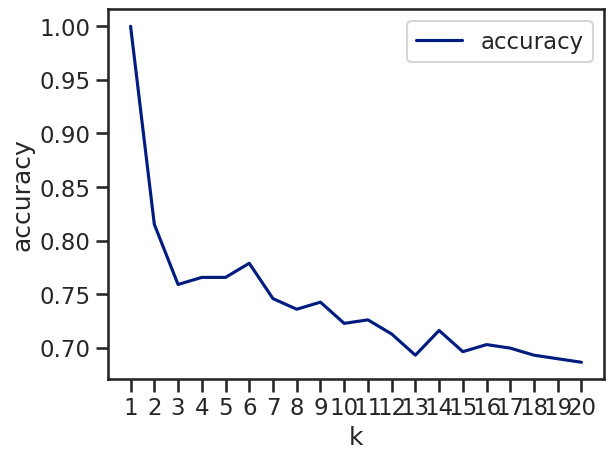

In [6]:


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));

